In [9]:
import numpy as np
import pandas as pd

1-Loading Data

In [10]:
data=pd.read_csv("Tr_ev_fiyatlari_v2.csv")

2-Data Exploration

In [11]:
data.head(3)

,fiyat,alan,yatak_odasi,banyo_sayisi,kat_sayisi,anayol_baglanti,misafir_odası,bodrum,sıcak_su,klima,otopark,mob_drm
0,13300000,7420,4,2,3,evet,hayır,hayır,hayır,evet,2,mobilyalı
1,12250000,8960,4,4,4,evet,hayır,hayır,hayır,evet,3,mobilyalı
2,12250000,9960,3,2,2,evet,hayır,evet,hayır,hayır,2,yarı mobilyalı


In [12]:
data.info()   #check whether elements are null or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fiyat            545 non-null    int64 
 1   alan             545 non-null    int64 
 2   yatak_odasi      545 non-null    int64 
 3   banyo_sayisi     545 non-null    int64 
 4   kat_sayisi       545 non-null    int64 
 5   anayol_baglanti  545 non-null    object
 6   misafir_odası    545 non-null    object
 7   bodrum           545 non-null    object
 8   sıcak_su         545 non-null    object
 9   klima            545 non-null    object
 10  otopark          545 non-null    int64 
 11  mob_drm          545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [13]:
data.describe()

,fiyat,alan,yatak_odasi,banyo_sayisi,kat_sayisi,otopark
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


3-Handling Categorical Columns

In [14]:
object_columns=data.select_dtypes(include=["object"]).columns    #select type equals object columns

In [15]:
object_columns

Index(['anayol_baglanti', 'misafir_odası', 'bodrum', 'sıcak_su', 'klima',
       'mob_drm'],
      dtype='object')

In [16]:
data1=pd.get_dummies(data, columns=object_columns,drop_first=True)   
data1

,fiyat,alan,yatak_odasi,banyo_sayisi,kat_sayisi,otopark,anayol_baglanti_hayır,misafir_odası_hayır,bodrum_hayır,sıcak_su_hayır,klima_hayır,mob_drm_mobilyasız,mob_drm_yarı mobilyalı
0,13300000,7420,4,2,3,2,False,True,True,True,False,False,False
1,12250000,8960,4,4,4,3,False,True,True,True,False,False,False
2,12250000,9960,3,2,2,2,False,True,False,True,True,False,True
3,12215000,7500,4,2,2,3,False,True,False,True,False,False,False
4,11410000,7420,4,1,2,2,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,False,True,False,True,True,True,False
541,1767150,2400,3,1,1,0,True,True,True,True,True,False,True
542,1750000,3620,2,1,1,0,False,True,True,True,True,True,False
543,1750000,2910,3,1,1,0,True,True,True,True,True,False,False


4-Standardizing Data

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data1)
df_normalized = pd.DataFrame(data=normalized_data,columns=data1.columns)
df_normalized

,fiyat,alan,yatak_odasi,banyo_sayisi,kat_sayisi,otopark,anayol_baglanti_hayır,misafir_odası_hayır,bodrum_hayır,sıcak_su_hayır,klima_hayır,mob_drm_mobilyasız,mob_drm_yarı mobilyalı
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692,-0.405623,0.465315,0.734539,0.219265,-1.472618,-0.696429,-0.844888
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409,-0.405623,0.465315,0.734539,0.219265,-1.472618,-0.696429,-0.844888
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692,-0.405623,0.465315,-1.361397,0.219265,0.679063,-0.696429,1.183588
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409,-0.405623,0.465315,-1.361397,0.219265,-1.472618,-0.696429,-0.844888
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692,-0.405623,-2.149083,-1.361397,0.219265,-1.472618,-0.696429,-0.844888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,-0.405623,0.465315,-1.361397,0.219265,0.679063,1.435896,-0.844888
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-0.805741,2.465344,0.465315,0.734539,0.219265,0.679063,-0.696429,1.183588
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741,-0.405623,0.465315,0.734539,0.219265,0.679063,1.435896,-0.844888
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-0.805741,2.465344,0.465315,0.734539,0.219265,0.679063,-0.696429,-0.844888


In [25]:
y = df_normalized["fiyat"]
x = df_normalized.drop("fiyat", axis=1).iloc[0]

5-Splitting Data into Training and Testing Sets

In [27]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df_normalized.drop("fiyat", axis=1), df_normalized["fiyat"], test_size=0.2, random_state=33)

6-Building and Training a Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [31]:
lr.fit(xtrain, ytrain)

LinearRegression()

7-Making Predictions

In [32]:
ypred = lr.predict(xtest)

In [33]:
ytest

257   -0.153436
122    0.633198
480   -0.977528
21     2.094088
138    0.520821
         ...   
67     1.138891
530   -1.352116
270   -0.228353
287   -0.303271
49     1.419831
Name: fiyat, Length: 109, dtype: float64

In [34]:
len(ypred)   #The lengths of the ytest and ypred must be the same to check for size mismatch

109

8-Model Evaluation

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest, ypred)
r2   #scoreun düşük olması modelin perofrmansının çok da iyi olmadığını gösterir, gerçi veri seti de çok yeterli değildi zaten(!)

0.5886667046527706

9-Visualizing Results

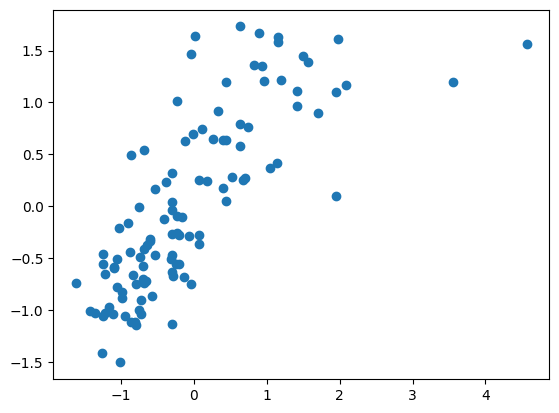

In [25]:
import matplotlib.pyplot as plt
plt.scatter(ytest,ypred)
plt.plot(ypred,ytest)
plt.show()

10-Manual Prediction

In [ ]:
area = int(input("enter the area: "))
bedroom = int(input("enter the bedroom number: "))
bathroom = int(input("enter the bathroom number: "))
number_floor = int(input("enter number of floor: "))
parking_lot = int(input("enter the parking lot: "))
highway = int(input("enter the highwway: "))
guest_room = int(input("enter the guest_room: "))
bodrum_floor = (input("enter the bordum floor: "))
hot_water = (input("enter the hot water: "))
cooler = (input("enter the cooler: "))
furniture = (input("enter the furniture: "))
half_furniture= (input("enter the half furniture: "))
price_predict= lr.predict([[area, bedroom, bathroom, number_floor, parking_lot, highway, guest_room, bodrum_floor, hot_water, cooler, furniture, half_furniture, half_furniture]])

11-Scaling Manual Input

In [27]:
manuel=np.array([[30, 54, 67, 89, 43, 54, 784, 54, 34, 65, 23, 45, 67]])
scaled_value = scaler.transform(manuel)

c:\Users\ipek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
scaled_value

array([[  -2.55077916,   -2.35064146,   86.84030523,  174.72567676,
          47.5304886 ,   61.92696939, 2250.43257031,  139.02838503,
          69.90045447,  306.13710164,   48.01604219,   95.25821133,
         135.06304737]])